# Program 5

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

In [2]:
df=pd.read_csv('P5_diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
#Splitting Dependent and independent Variables

In [7]:
X=df.drop(['Outcome'],axis=1)

In [8]:
y=df['Outcome'].values

In [9]:
#Formation of train and test Data

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [12]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [13]:
y_pred=clf.predict(X_test)

In [14]:
#checking the number of true or false positives/negatives

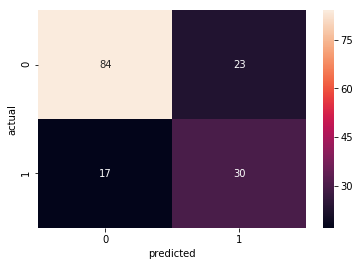

In [15]:
confusion_matrix = pd.crosstab(y_test, y_pred,rownames=['actual'],colnames=['predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [16]:
#Evaluation metrics

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7402597402597403


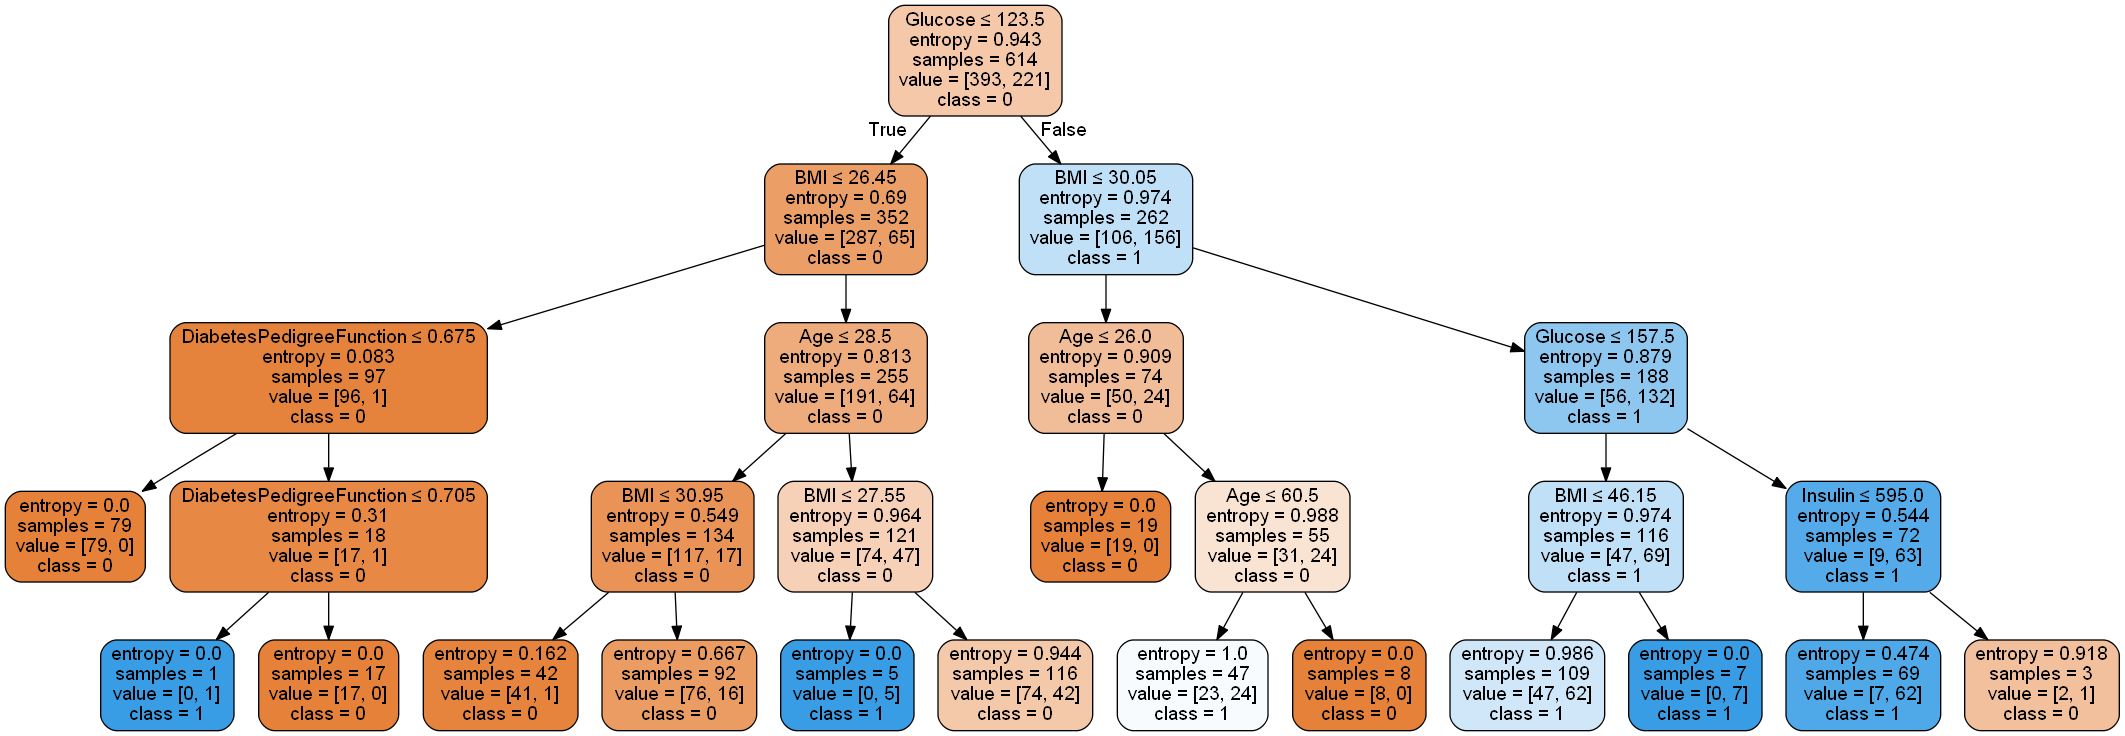

In [18]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())